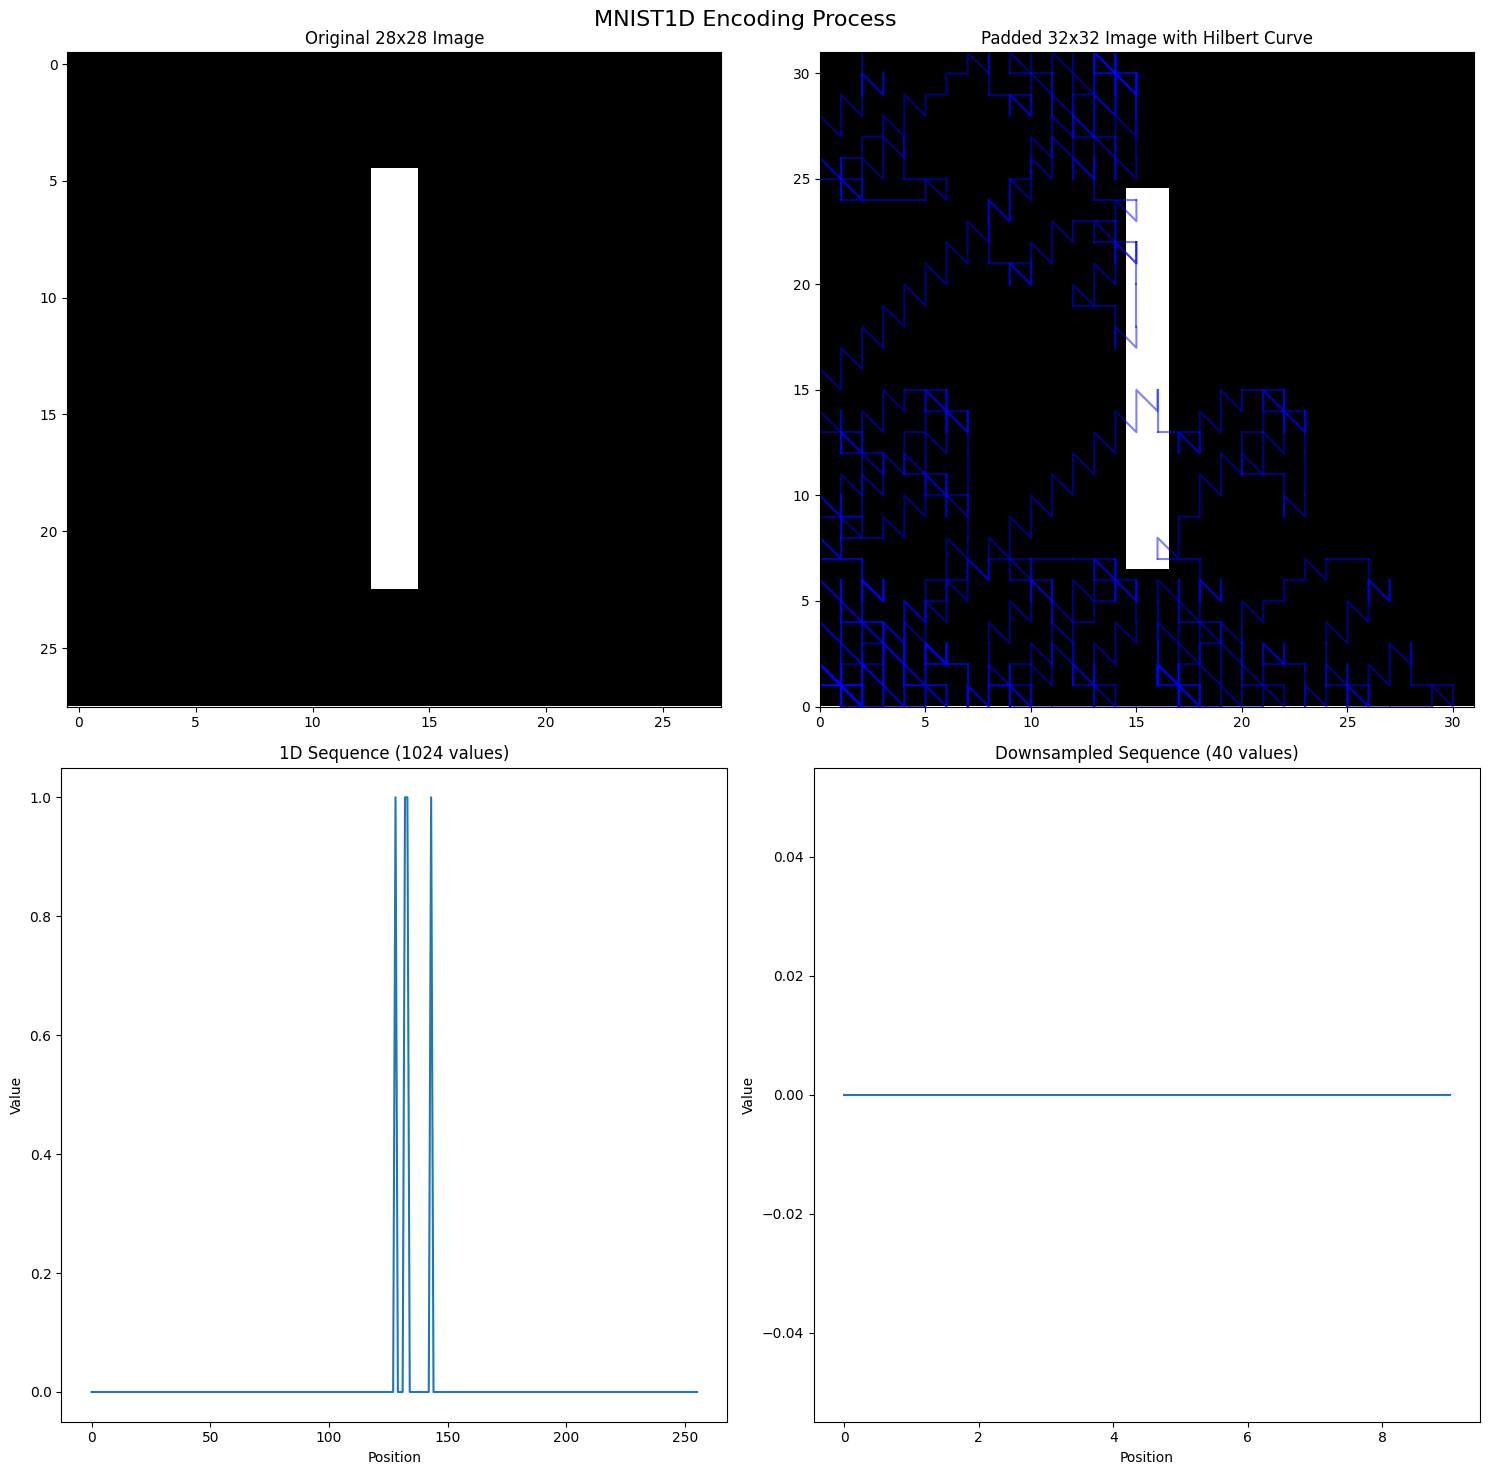

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from skimage.draw import line_aa

def hilbert_curve(n):
    if n == 1:
        return np.array([[0, 0]])
    else:
        t = hilbert_curve(n - 1)
        return np.vstack((t @ [[0, 1], [1, 0]] + [0, 0],
                          t + [2**(n-1), 0],
                          t + [2**(n-1), 2**(n-1)],
                          (t @ [[0, -1], [-1, 0]] + [2**n-1, 2**(n-1)-1])))

def draw_hilbert_curve(ax, size=32):
    points = hilbert_curve(5)  # 2^5 = 32
    for i in range(len(points) - 1):
        rr, cc, val = line_aa(points[i, 0], points[i, 1], points[i+1, 0], points[i+1, 1])
        ax.plot(cc, size - 1 - rr, 'b-', alpha=0.5)
    ax.set_xlim(0, size-1)
    ax.set_ylim(0, size-1)

# Load MNIST data (you'll need to replace this with actual MNIST data loading)
# For this example, we'll create a simple digit-like image
digit = np.zeros((28, 28))
digit[5:23, 13:15] = 1  # Vertical line for digit '1'

# Pad to 32x32
padded_digit = np.pad(digit, ((2,2), (2,2)), mode='constant')

# Create the visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("MNIST1D Encoding Process", fontsize=16)

# Original Image
axes[0, 0].imshow(digit, cmap='gray')
axes[0, 0].set_title("Original 28x28 Image")

# Padded Image with Hilbert Curve
axes[0, 1].imshow(padded_digit, cmap='gray')
draw_hilbert_curve(axes[0, 1])
axes[0, 1].set_title("Padded 32x32 Image with Hilbert Curve")

# 1D Sequence (1024 values)
sequence_1024 = padded_digit.flatten()[hilbert_curve(5).dot([1, 32])]
axes[1, 0].plot(sequence_1024)
axes[1, 0].set_title("1D Sequence (1024 values)")
axes[1, 0].set_xlabel("Position")
axes[1, 0].set_ylabel("Value")

# Downsampled Sequence (40 values)
sequence_40 = zoom(sequence_1024, 40/1024, order=1)
axes[1, 1].plot(sequence_40)
axes[1, 1].set_title("Downsampled Sequence (40 values)")
axes[1, 1].set_xlabel("Position")
axes[1, 1].set_ylabel("Value")

plt.tight_layout()
plt.show()